In [1]:
import  pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df1=pd.read_csv("../data/Bengaluru_House_Data.csv")
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df1.shape 

(13320, 9)

In [4]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2=df1.drop(["area_type","availability","society","balcony"],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
#----------------data cleaning process---------------------------------#

In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df2=df2.dropna()
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df2["bhk"]=df2["size"].apply(lambda x: int(x.split(" ")[0]))
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df2["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [12]:
df2.drop("size",axis=1,inplace=True)

In [13]:
df2[df2.bhk>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [14]:
df2["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df2[~df2["total_sqft"].apply(is_float)].head(10)

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [17]:
def convert_sqft(x):
    if pd.isna(x):
        return None
    
    tokens = str(x).split("-")
    
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    
    try:
        return float(x)
    except:
        return None


In [18]:
df2["total_sqft"] = df2["total_sqft"].apply(convert_sqft)
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [19]:
df2 = df2.dropna(subset=["total_sqft"])

In [20]:
#-------------------------feature engineering----------------------------#

In [21]:
df2.head(10)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2
6,Old Airport Road,2732.0,4.0,204.00,4
7,Rajaji Nagar,3300.0,4.0,600.00,4
8,Marathahalli,1310.0,3.0,63.25,3
9,Gandhi Bazar,1020.0,6.0,370.00,6


In [22]:
df2["price_per_sqrt"]=df2["price"]*100000/df2["total_sqft"]
df2.head()

,location,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [23]:
len(df2.location.unique())

1298

In [24]:
df2.location=df2.location.apply(lambda x:x.strip())
location_stats=df2.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield                         533
Sarjapur  Road                     392
Electronic City                    304
Kanakpura Road                     264
Thanisandra                        235
                                  ... 
beml layout, basaveshwara nagar      1
basaveshwarnagar                     1
1 Giri Nagar                         1
4 Bedroom Farm House in Bagalur      1
3rd Stage Raja Rajeshwari Nagar      1
Name: location, Length: 1287, dtype: int64

In [25]:
len(location_stats[location_stats<=10])

1047

In [26]:
location_less_than_10=location_stats[location_stats<=10]
location_less_than_10

location
1st Block Koramangala              10
Thyagaraja Nagar                   10
Ganga Nagar                        10
Nagappa Reddy Layout               10
Gunjur Palya                       10
                                   ..
beml layout, basaveshwara nagar     1
basaveshwarnagar                    1
1 Giri Nagar                        1
4 Bedroom Farm House in Bagalur     1
3rd Stage Raja Rajeshwari Nagar     1
Name: location, Length: 1047, dtype: int64

In [27]:
df2.location=df2.location.apply(lambda x:"other" if x in location_less_than_10 else x)
len(df2.location.unique())

241

In [28]:
df2.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [29]:
#--------------------------outlier removal----------------------------------------#

In [30]:
df2[df2.total_sqft/df2.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqrt
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [31]:
df3=df2[~(df2.total_sqft/df2.bhk<300)]
df3.head()

,location,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [32]:
df3.shape

(12456, 6)

In [33]:
df3["price_per_sqrt"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqrt, dtype: float64

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()

    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqrt)
        st = np.std(subdf.price_per_sqrt)

        reduced_df = subdf[(subdf.price_per_sqrt > (m - st)) & (subdf.price_per_sqrt <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)

    return df_out

In [35]:
df4=remove_pps_outliers(df3)
df4.shape

(10242, 6)

In [36]:
def plot_scatter_chart(df, location):

    bhk2 = df[(df["location"] == location) & (df["bhk"] == 2)]
    bhk3 = df[(df["location"] == location) & (df["bhk"] == 3)]

    matplotlib.rcParams['figure.figsize'] = (15, 10)

    plt.scatter(
        bhk2["total_sqft"],
        bhk2["price_per_sqrt"],
        color="blue",
        label="2 BHK",
        s=50
    )

    plt.scatter(
        bhk3["total_sqft"],
        bhk3["price_per_sqrt"],
        color="green",
        label="3 BHK",
        s=50
    )

    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    plt.show()

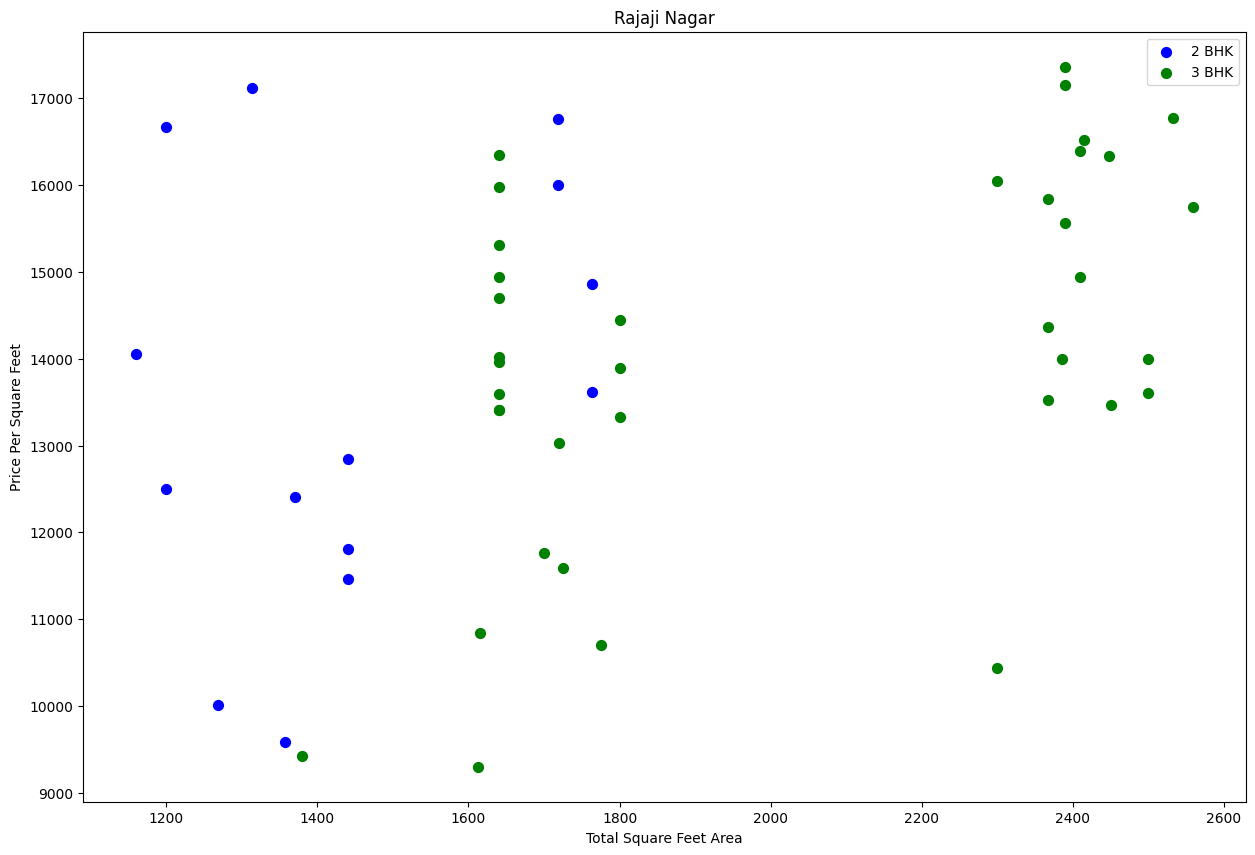

In [37]:
plot_scatter_chart(df4,"Rajaji Nagar")

In [38]:
def remove_bhk_outliers(df):
    
    exclude_indices = np.array([])
    
    for location, location_df in df.groupby("location"):
        
        bhk_stats = {}
        
        for bhk, bhk_df in location_df.groupby("bhk"):
            
            bhk_stats[bhk] = {
                "mean": np.mean(bhk_df["price_per_sqrt"]),
                "std": np.std(bhk_df["price_per_sqrt"]),
                "count": bhk_df.shape[0]
            }
            
        for bhk, bhk_df in location_df.groupby("bhk"):
            
            stats = bhk_stats.get(bhk - 1)
            
            if stats and stats["count"] > 5:
                
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df["price_per_sqrt"] < stats["mean"]].index.values
                )
    
    return df.drop(exclude_indices, axis="index")


In [39]:
df5=remove_bhk_outliers(df4)
df5.shape

(7317, 6)

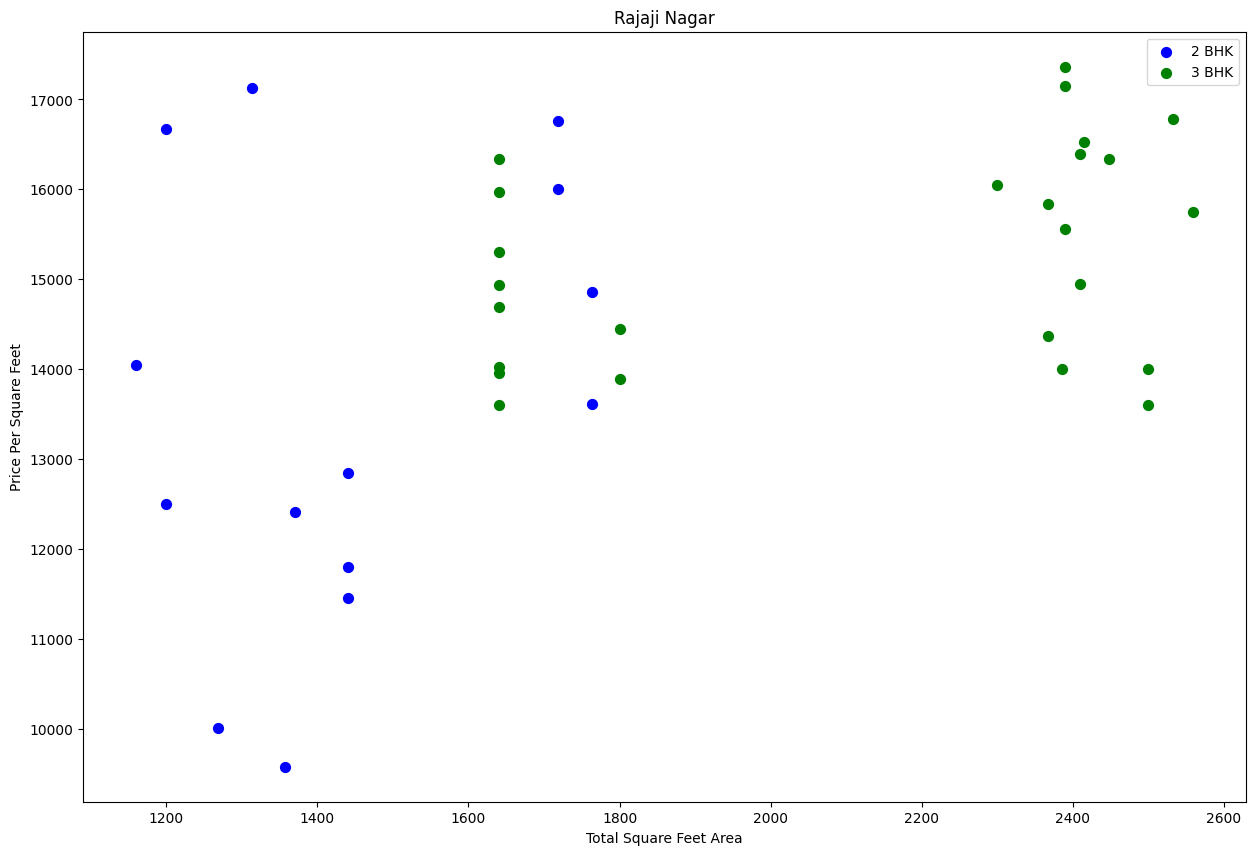

In [40]:
plot_scatter_chart(df5,"Rajaji Nagar")

Text(0, 0.5, 'count')

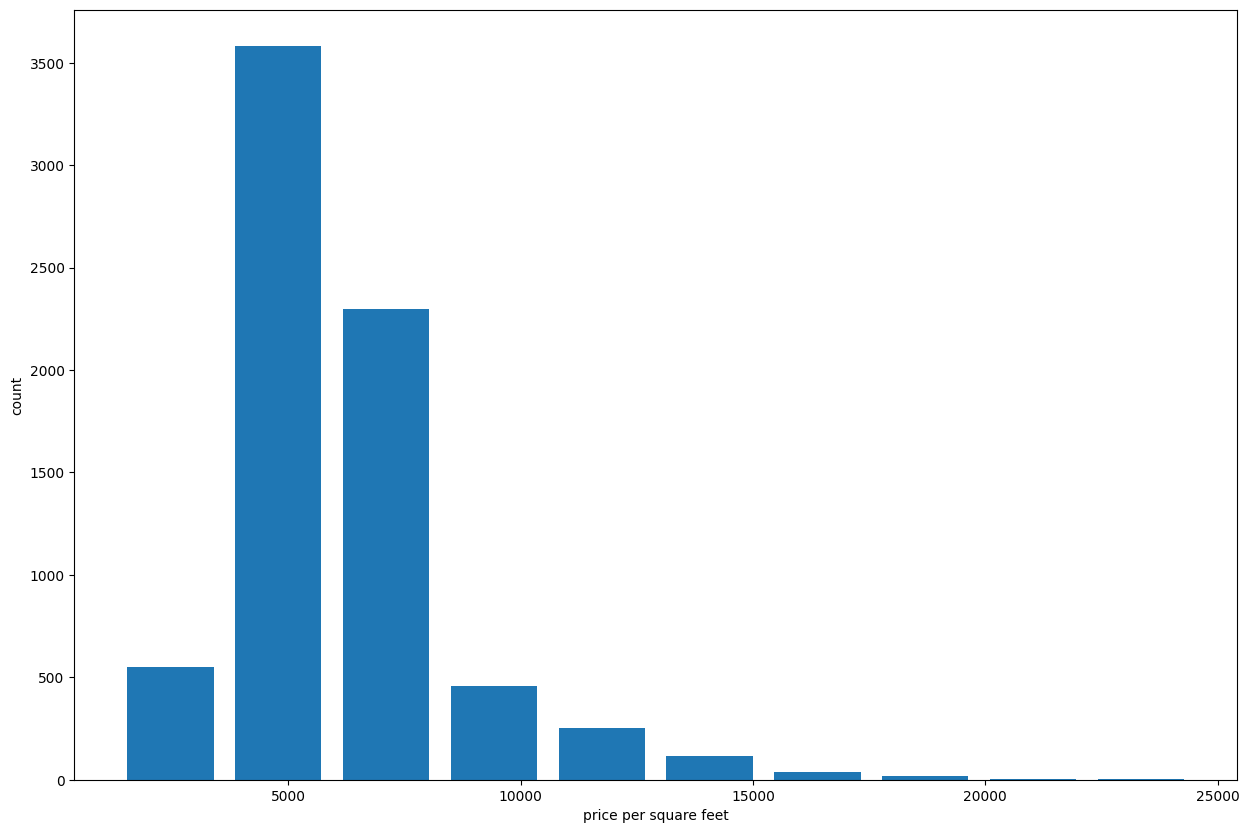

In [41]:
plt.hist(df5.price_per_sqrt,rwidth=0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

In [42]:
df5.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [43]:
df5[df5.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqrt
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8483,other,12000.0,12.0,525.0,10,4375.000000
8572,other,10000.0,16.0,550.0,16,5500.000000
9306,other,6000.0,12.0,150.0,11,2500.000000
9637,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

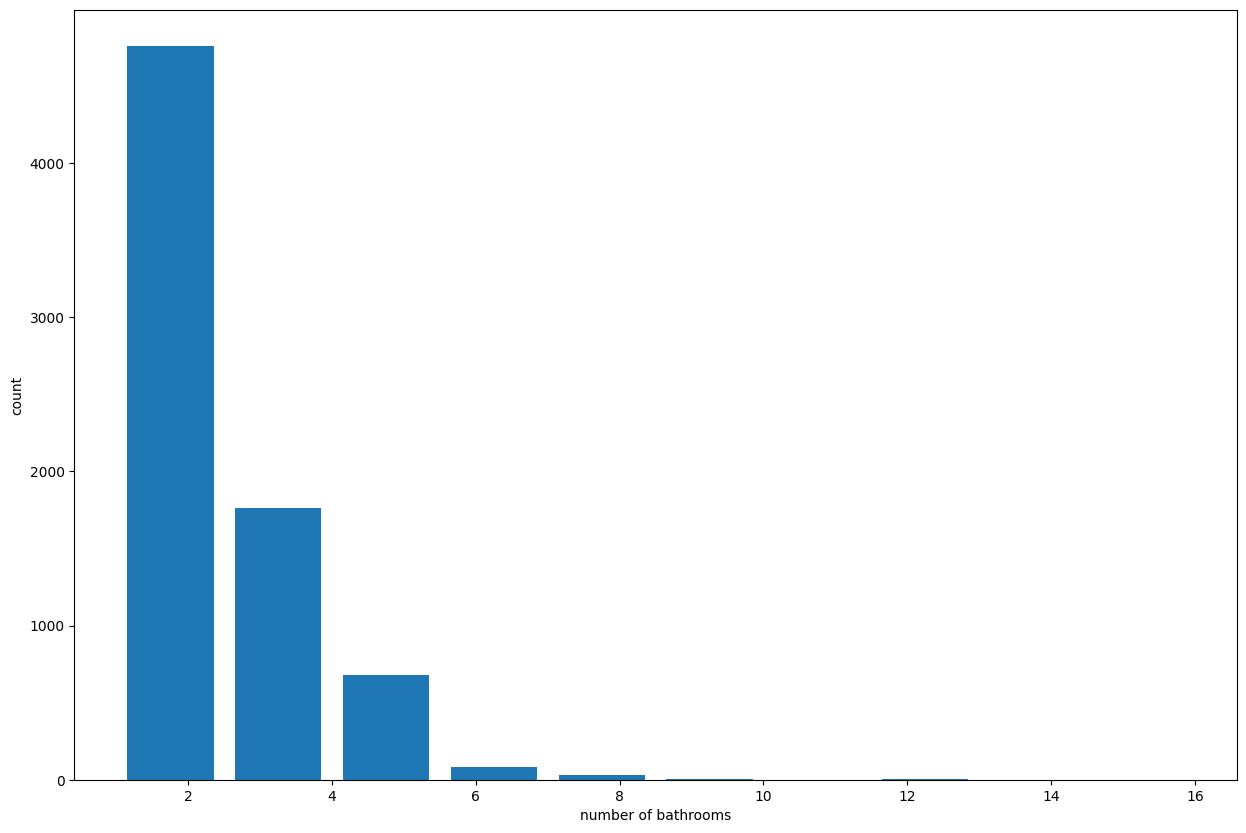

In [44]:
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel("count")

In [45]:
df5[df5.bath>df5.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqrt
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8408,other,11338.0,9.0,1000.0,6,8819.897689


In [46]:
df6=df5[df5.bath<df5.bhk+2]

In [47]:
df6.shape

(7239, 6)

In [48]:
#-----------------------one hot encoding-----------------------------#

In [49]:
df7=df6.drop(["price_per_sqrt"],axis=1)
df7.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [50]:
dummies=pd.get_dummies(df7.location).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df8=pd.concat([df7,dummies.drop("other",axis=1)],axis=1)
df8.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df8.shape

(7239, 245)

In [53]:
x=df8.drop(["price","location"],axis=1)
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y=df8.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [55]:
#-----------------------model building-----------------------------#

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [57]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8629132245229446

In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)   

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [59]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, GridSearchCV

def find_best_model_using_gridsearchcv(X, y):

    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },

        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },

        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():

        gs = GridSearchCV(
            config['model'],
            config['params'],
            cv=cv,
            return_train_score=False
        )

        gs.fit(X, y)

        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model_using_gridsearchcv(x, y)

,model,best_score,best_params
0,linear_regression,0.847951,{'fit_intercept': False}
1,lasso,0.726786,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.718966,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [60]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [61]:
import numpy as np

def predict_price(location, sqft, bath, bhk, model, x_columns):

    x = np.zeros(len(x_columns))

    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    if location in x_columns:
        loc_index = np.where(x_columns == location)[0][0]
        x[loc_index] = 1  

    return model.predict([x])[0]


In [62]:
predicted_price = predict_price(
    location="Whitefield",
    sqft=1000,
    bath=2,
    bhk=2,
    model=model,
    x_columns=x.columns
)

print("Predicted Price (Lakhs):", predicted_price)


Predicted Price (Lakhs): 53.726372072434984


C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [63]:
predict_price("1st phase JP Nagar",1000,2,2,model,x.columns)

C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(81.41532588414243)

In [64]:
predict_price("Indira Nagar",2000,3,2,model,x.columns)

C:\Users\sanja\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(277.1468272417155)

In [65]:
#---------------------------exporting---------------------------#

In [66]:
import pickle
with open("../app/models/bengaluru_home_price_model.pickle", "wb")as file:
    pickle.dump(model,file)

In [67]:
import json

columns = {
    "data_columns": x.columns.tolist()
}

with open("../columns.json", "w") as f:
    json.dump(columns, f)
